# Import libraries

In [2]:
# Add the parent directory to the path
import sys
import os
sys.path.append(os.path.abspath('..'))

In [3]:
from algorithms.genetic_algorithm.entities import *
from algorithms.genetic_algorithm.selection import *
from algorithms.genetic_algorithm.crossover import *
from algorithms.genetic_algorithm.mutation import *
from algorithms.genetic_algorithm.genetic_algorithm import *
from algorithms.hill_climbing import *
from algorithms.simulated_annealing import *
from tuning.configurations_tune import *
from tuning.parameters_tune import *

from utils import *

# Fixed Parameters

In [4]:
POP_SIZE = 50
N_GENERATIONS = 100
elitism = True
maximization = True

selection_base = tournament_selection
crossover = pmx_crossover
mutation_base = n_swap_mutation

# Run GA Configurations

## Tournament Selection

In [2]:
crossover_operators = [pmx_crossover, fitness_based_slot_crossover]
mutation_operators = [n_swap_mutation, scramble_mutation, prime_slot_swap_mutation, preserve_best_slots_mutation]
selection_methods = [tournament_selection]

configurations= list(product(crossover_operators, mutation_operators, selection_methods))

In [21]:
results_tournament = grid_search(configurations=configurations, mode='detailed', n_runs=1, verbose_ga=False)

Run 1 - Selection: tournament_selection | Crossover: pmx_crossover | Mutation: preserve_best_slots_mutation


In [31]:
results_tournament

,Selection: tournament_selection | Crossover: pmx_crossover | Mutation: preserve_best_slots_mutation
0,"[1.259692842654303, 1.4204897131266296, 1.4204..."


In [ ]:
long_format_rows = []

for col in results_tournament.columns:
    parts = col.split(" | ")
    selection = parts[0].split(": ")[1]
    crossover = parts[1].split(": ")[1]
    mutation = parts[2].split(": ")[1]

    # Get raw data from cell
    raw = results_tournament[col].dropna().values[0]

    # Decode JSON string if needed
    if isinstance(raw, str):
        raw = json.loads(raw)

    # If it's a list of one run, unwrap it
    fitness_history = raw[0] if isinstance(raw, list) and len(raw) == 1 else raw

    long_format_rows.append({
        "Selection": selection,
        "Crossover": crossover,
        "Mutation": mutation,
        "Run": 1,
        "Fitness_History": fitness_history,
        "Config": col
    })

results_tournament = pd.DataFrame(long_format_rows)

In [16]:
results_tournament.to_csv("results_tournament_selection.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

## Ranking Selection

In [ ]:
crossover_operators = [pmx_crossover, fitness_based_slot_crossover]
mutation_operators = [n_swap_mutation, scramble_mutation, prime_slot_swap_mutation, preserve_best_slots_mutation]
selection_methods = [ranking_selection]

configurations= list(product(crossover_operators, mutation_operators, selection_methods))

In [ ]:
results_ranking = grid_search(configurations=configurations, mode='detailed', n_runs=30, verbose_ga=False)

In [ ]:
long_format_rows = []

for col in results_ranking.columns:
    parts = col.split(" | ")
    selection = parts[0].split(": ")[1]
    crossover = parts[1].split(": ")[1]
    mutation = parts[2].split(": ")[1]

    # Get raw data from cell
    raw = results_ranking[col].dropna().values[0]

    # Decode JSON string if needed
    if isinstance(raw, str):
        raw = json.loads(raw)

    # If it's a list of one run, unwrap it
    fitness_history = raw[0] if isinstance(raw, list) and len(raw) == 1 else raw

    long_format_rows.append({
        "Selection": selection,
        "Crossover": crossover,
        "Mutation": mutation,
        "Run": 1,
        "Fitness_History": fitness_history,
        "Config": col
    })

results_ranking = pd.DataFrame(long_format_rows)

In [ ]:
results_ranking.to_csv("results_ranking_selection.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

## Fitness Proportionate Selection

In [ ]:
crossover_operators = [pmx_crossover, fitness_based_slot_crossover]
mutation_operators = [n_swap_mutation, scramble_mutation, prime_slot_swap_mutation, preserve_best_slots_mutation]
selection_methods = [fitness_proportionate_selection]

configurations= list(product(crossover_operators, mutation_operators, selection_methods))

In [ ]:
results_fit_prop = grid_search(configurations=configurations, mode='detailed', n_runs=30, verbose_ga=False)

In [ ]:
long_format_rows = []

for col in results_fit_prop.columns:
    parts = col.split(" | ")
    selection = parts[0].split(": ")[1]
    crossover = parts[1].split(": ")[1]
    mutation = parts[2].split(": ")[1]

    # Get raw data from cell
    raw = results_fit_prop[col].dropna().values[0]

    # Decode JSON string if needed
    if isinstance(raw, str):
        raw = json.loads(raw)

    # If it's a list of one run, unwrap it
    fitness_history = raw[0] if isinstance(raw, list) and len(raw) == 1 else raw

    long_format_rows.append({
        "Selection": selection,
        "Crossover": crossover,
        "Mutation": mutation,
        "Run": 1,
        "Fitness_History": fitness_history,
        "Config": col
    })

results_fit_prop = pd.DataFrame(long_format_rows)

In [ ]:
results_fit_prop.to_csv("results_fit_prop_selection.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

## Concatenate DataFrames

In [ ]:
results = pd.concat([results_fit_prop, results_tournament, results_ranking], ignore_index=True)

In [ ]:
results.to_csv("final_results.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

# Run SA e HC

In [ ]:
initial_solution = Individual(
    mutation_function=n_swap_mutation,
    crossover_function=pmx_crossover
)

In [ ]:
hc_best_fitnesses = []
sa_best_fitnesses =[]
ga_best_fitnesses = []

for run_nr in range(30):
    hc_best_solution = hill_climbing(
        initial_solution=initial_solution,
        maximization=False
    )
    sa_best_solution = simulated_annealing(
        initial_solution=initial_solution,
        maximization=False,
        C=1,
        L=10,
        H=0.1,
        max_iter=100
    )
    ga_best_solution, _ = genetic_algorithm(
        initial_solution,
        max_gen=100,
        selection_algorithm=fitness_proportionate_selection,
        xo_prob=0.9,
        mut_prob=0.1,
        elitism=True
    )

    hc_best_fitnesses.append(hc_best_solution.fitness())
    sa_best_fitnesses.append(sa_best_solution.fitness())
    ga_best_fitnesses.append(ga_best_solution.fitness())

In [ ]:
# Create a DataFrame in long format
df = pd.DataFrame({
    'value': hc_best_fitnesses + sa_best_fitnesses + ga_best_fitnesses,
    'group': ['HC'] * len(hc_best_fitnesses) + ['SA'] * len(sa_best_fitnesses) + ['GA'] * len(ga_best_fitnesses)
})

# Set a beautiful theme
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='group', y='value', data=df, width=0.5, linewidth=2.5, fliersize=4)

# Titles and labels
plt.title('Comparison of HC, SA and GA')
plt.xlabel('Algorithms')
plt.ylabel('Fitness of best found individual')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Run GA Hyperparameter Tuning

In [3]:
results_hyperparameter = random_search(mode='detailed', verbose_ga=False)

Configuration 1: xo_prob=0.91, mut_prob=0.32, n_swaps=3, tournament_size=4
  Run 1/30
  Run 2/30
  Run 3/30
  Run 4/30
  Run 5/30
  Run 6/30
  Run 7/30
  Run 8/30
  Run 9/30
  Run 10/30
  Run 11/30
  Run 12/30
  Run 13/30
  Run 14/30
  Run 15/30
  Run 16/30
  Run 17/30
  Run 18/30
  Run 19/30
  Run 20/30
  Run 21/30
  Run 22/30
  Run 23/30
  Run 24/30
  Run 25/30
  Run 26/30
  Run 27/30
  Run 28/30
  Run 29/30
  Run 30/30
Configuration 2: xo_prob=0.65, mut_prob=0.25, n_swaps=3, tournament_size=8
  Run 1/30
  Run 2/30
  Run 3/30
  Run 4/30
  Run 5/30
  Run 6/30
  Run 7/30
  Run 8/30
  Run 9/30
  Run 10/30
  Run 11/30
  Run 12/30
  Run 13/30
  Run 14/30
  Run 15/30
  Run 16/30
  Run 17/30
  Run 18/30
  Run 19/30
  Run 20/30
  Run 21/30
  Run 22/30
  Run 23/30
  Run 24/30
  Run 25/30
  Run 26/30
  Run 27/30
  Run 28/30
  Run 29/30
  Run 30/30
Configuration 3: xo_prob=0.98, mut_prob=0.36, n_swaps=4, tournament_size=3
  Run 1/30
  Run 2/30
  Run 3/30
  Run 4/30
  Run 5/30
  Run 6/30
  Run 7

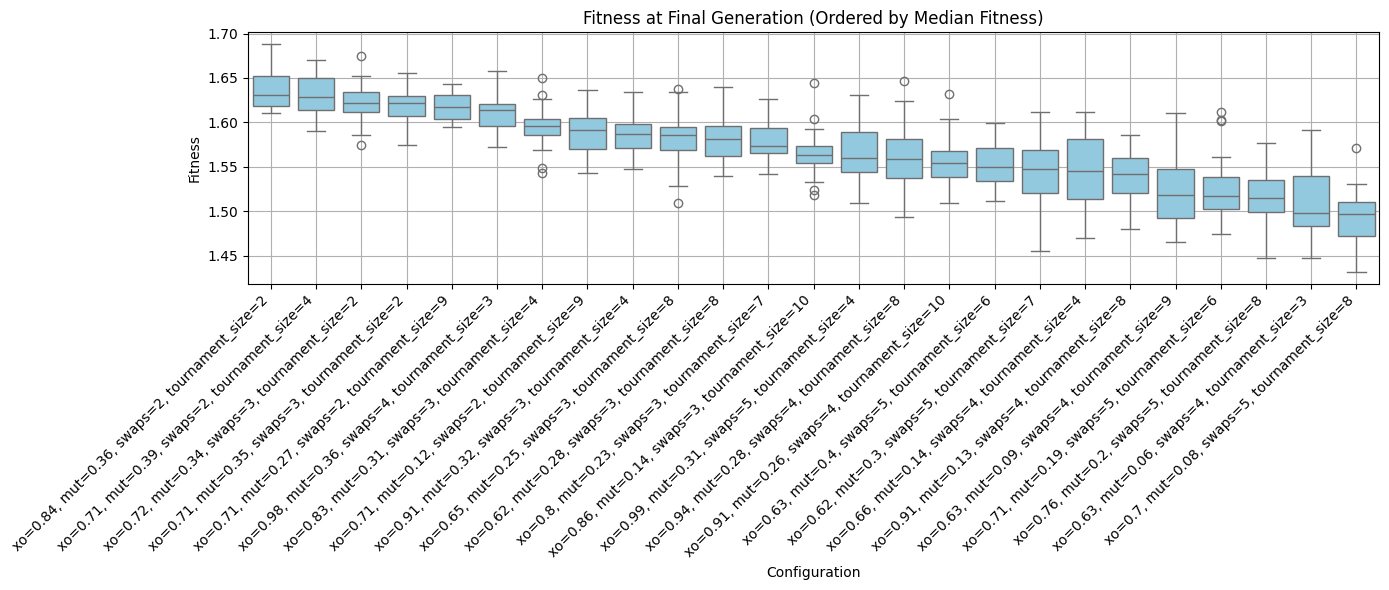

In [ ]:
# Parse JSON strings to lists
results_hyperparameter['fitness_history'] = results_hyperparameter['fitness_history'].apply(json.loads)


# Store fitness values at the final generation for each config
final_gen_fitness = []

for idx, row in results_hyperparameter.iterrows():
    config_name = f"xo={row['xo_prob']}, mut={row['mut_prob']}, swaps={row['n_swaps']}, tournament_size={row['tournament_size']}"
    run_histories = row['fitness_history']  # Already a list of 30 runs
    final_gen_index = len(run_histories[0]) - 1  # Last generation
    
    for run_id, run in enumerate(run_histories):
        final_gen_fitness.append({
            'Configuration': config_name,
            'Fitness': run[final_gen_index],
            'Run': f'Run {run_id + 1}'
        })

# Create DataFrame
df_final = pd.DataFrame(final_gen_fitness)

# Compute median fitness per configuration and order
median_order = df_final.groupby("Configuration")["Fitness"].median().sort_values(ascending=False).index

# Plot with custom order
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_final, x='Configuration', y='Fitness', order=median_order, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Fitness at Final Generation (Ordered by Median Fitness)")
plt.tight_layout()
plt.grid(True)
plt.show()



In [5]:
results_hyperparameter.to_csv("results_hyperparameter.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

In [ ]:
results_hyperparameter = random_search(xo_range=(0.7, 0.9), mut_range=(0.2, 0.4), swap_range=(2, 4), tournament_range=(2, 9), n_iterations=25, mode='detailed', verbose_ga=False)

Configuration 1: xo_prob=0.75, mut_prob=0.24, n_swaps=3, tournament_size=6
  Run 1/30
  Run 2/30
  Run 3/30
  Run 4/30
  Run 5/30
  Run 6/30
  Run 7/30
  Run 8/30
  Run 9/30
  Run 10/30
  Run 11/30
  Run 12/30
  Run 13/30
  Run 14/30
  Run 15/30
  Run 16/30
  Run 17/30
  Run 18/30
  Run 19/30
  Run 20/30
  Run 21/30
  Run 22/30
  Run 23/30
  Run 24/30
  Run 25/30
  Run 26/30
  Run 27/30
  Run 28/30
  Run 29/30
  Run 30/30
Configuration 2: xo_prob=0.75, mut_prob=0.3, n_swaps=4, tournament_size=7
  Run 1/30
  Run 2/30
  Run 3/30
  Run 4/30
  Run 5/30
  Run 6/30
  Run 7/30
  Run 8/30
  Run 9/30
  Run 10/30
  Run 11/30
  Run 12/30
  Run 13/30
  Run 14/30
  Run 15/30
  Run 16/30
  Run 17/30
  Run 18/30
  Run 19/30
  Run 20/30
  Run 21/30
  Run 22/30
  Run 23/30
  Run 24/30
  Run 25/30
  Run 26/30
  Run 27/30
  Run 28/30
  Run 29/30
  Run 30/30
Configuration 3: xo_prob=0.84, mut_prob=0.3, n_swaps=4, tournament_size=9
  Run 1/30
  Run 2/30
  Run 3/30
  Run 4/30
  Run 5/30
  Run 6/30
  Run 7/3

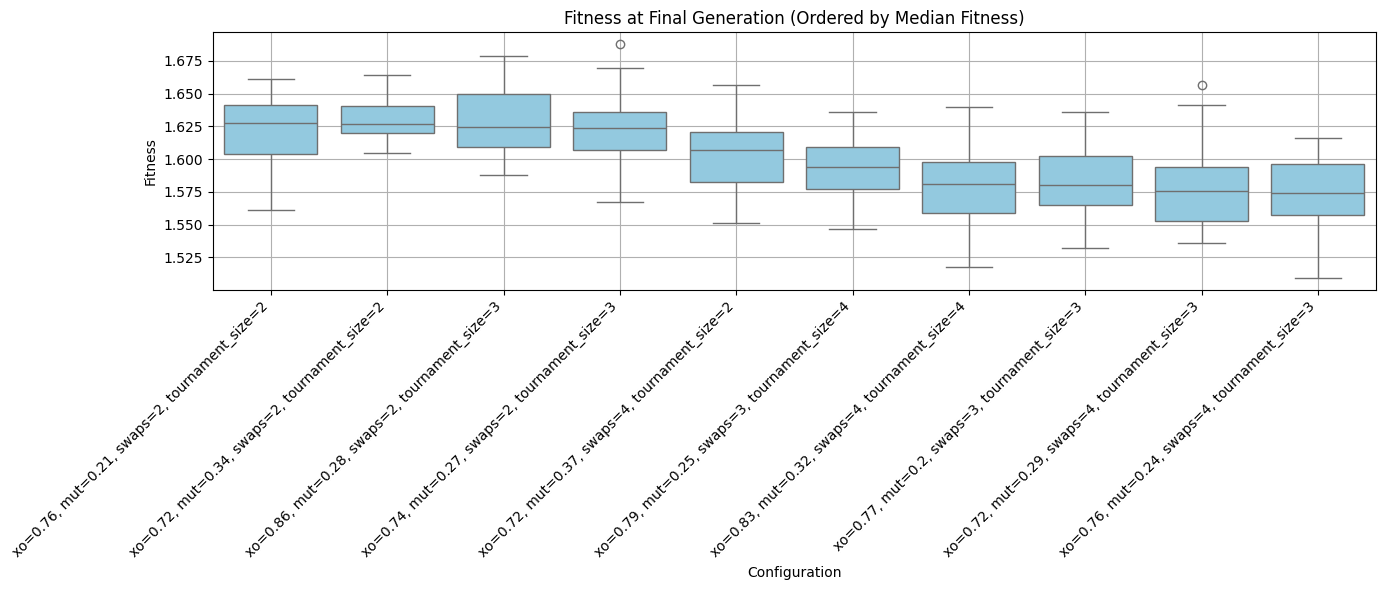

In [ ]:
# Parse JSON strings to lists
results_hyperparameter['fitness_history'] = results_hyperparameter['fitness_history'].apply(json.loads)

# Store fitness values at the final generation for each config
final_gen_fitness = []

for idx, row in results_hyperparameter.iterrows():
    config_name = f"xo={row['xo_prob']}, mut={row['mut_prob']}, swaps={row['n_swaps']}, tournament_size={row['tournament_size']}"
    run_histories = row['fitness_history']  # Already a list of 30 runs
    final_gen_index = len(run_histories[0]) - 1  # Last generation
    
    for run_id, run in enumerate(run_histories):
        final_gen_fitness.append({
            'Configuration': config_name,
            'Fitness': run[final_gen_index],
            'Run': f'Run {run_id + 1}'
        })

# Create DataFrame
df_final = pd.DataFrame(final_gen_fitness)

# Compute median fitness per configuration and order
median_order = df_final.groupby("Configuration")["Fitness"].median().sort_values(ascending=False).index

# Plot with custom order
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_final, x='Configuration', y='Fitness', order=median_order, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Fitness at Final Generation (Ordered by Median Fitness)")
plt.tight_layout()
plt.grid(True)
plt.show()

# Run Final Solution

In [15]:
n_swaps = 2
tournament_size = 4
xo_prob = 0.9
mut_prob = 0.1

In [22]:
mutation = partial(mutation_base, n_swaps=n_swaps)
selection = partial(selection_base, tournament_size=tournament_size)

initial_population = Population(population_size = POP_SIZE, crossover_function=crossover, mutation_function=mutation)
            
fitness_history, final_solution = genetic_algorithm(initial_population=initial_population,
                    max_gen=N_GENERATIONS,
                    selection_algorithm=selection,
                    maximization=maximization,
                    xo_prob=xo_prob,
                    mut_prob=mut_prob,
                    elitism=elitism,
                    verbose_ga=True)

-------------- Generation: 1 --------------

Selected individuals:
Fitness: 1.1635
Slot 1: [3, 26, 17, 11, 12]
Slot 2: [30, 21, 13, 18, 0]
Slot 3: [10, 19, 31, 16, 2]
Slot 4: [28, 34, 7, 15, 14]
Slot 5: [8, 20, 5, 33, 24]
Slot 6: [1, 27, 9, 4, 22]
Slot 7: [29, 23, 6, 32, 25]
Fitness: 1.0854
Slot 1: [12, 27, 20, 15, 11]
Slot 2: [28, 0, 22, 2, 26]
Slot 3: [24, 32, 5, 9, 16]
Slot 4: [31, 19, 30, 29, 21]
Slot 5: [4, 10, 1, 34, 17]
Slot 6: [3, 14, 13, 8, 18]
Slot 7: [33, 23, 7, 6, 25]

Applied crossover - offspring:
Fitness: 1.1685
Slot 1: [3, 26, 20, 15, 11]
Slot 2: [28, 21, 13, 18, 0]
Slot 3: [10, 19, 31, 16, 2]
Slot 4: [30, 34, 7, 12, 14]
Slot 5: [8, 17, 5, 33, 24]
Slot 6: [1, 27, 9, 4, 22]
Slot 7: [29, 23, 6, 32, 25]
Fitness: 1.1404
Slot 1: [15, 27, 17, 11, 12]
Slot 2: [30, 0, 22, 2, 26]
Slot 3: [24, 32, 5, 9, 16]
Slot 4: [31, 19, 28, 29, 21]
Slot 5: [4, 10, 1, 34, 20]
Slot 6: [3, 14, 13, 8, 18]
Slot 7: [33, 23, 7, 6, 25]

First mutated individual:
Fitness: 1.1685
Slot 1: [3, 26, 20, 15

In [25]:
final_solution

Fitness: 1.3625
Slot 1: [25, 29, 1, 15, 13]
Slot 2: [7, 0, 31, 17, 11]
Slot 3: [24, 3, 12, 4, 20]
Slot 4: [9, 32, 10, 26, 5]
Slot 5: [27, 16, 2, 18, 19]
Slot 6: [33, 30, 8, 28, 34]
Slot 7: [6, 21, 14, 22, 23]